Importing the Dependencies


In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [396]:
# loading the diabetes dataset to a pandas DataFrame
data = pd.read_csv('diabetes.csv')

In [397]:
# printing the first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [398]:
# number of rows and Columns in this dataset
data.shape

(768, 9)

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [400]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [401]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

<Axes: >

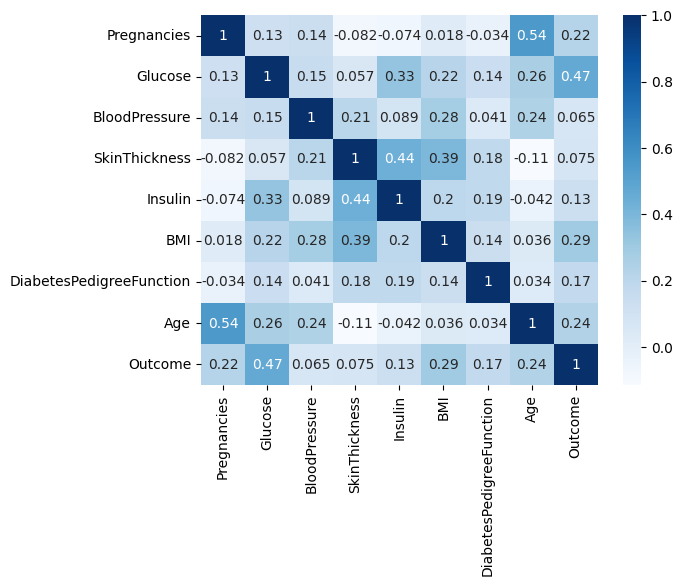

In [402]:
corr = data.corr(numeric_only=True)
corr
sns.heatmap(corr, annot=True, cmap='Blues')

In [403]:
# separating the data and labels
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [404]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=24)

standard the data

Training the Model

In [405]:
lr = LogisticRegression()

In [406]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model evaluation

In [407]:

predicions = lr.predict(x_train)


accuracy = accuracy_score(predicions, y_train)
print(accuracy)

0.7850162866449512


In [408]:
predicions = lr.predict(x_test)


accuracy = accuracy_score(predicions, y_test)
print(accuracy)

0.7597402597402597


In [409]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

predicions = model.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(predicions, y_test)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, predicions)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, predicions)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, predicions)
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, predicions)
print(f"F1-Score: {f1:.2f}")

# Full classification report
class_report = classification_report(y_test, predicions)
print("Classification Report:\n", class_report)




Confusion Matrix:
 [[88 24]
 [12 30]]
Accuracy: 0.77
Precision: 0.71
Recall: 0.56
F1-Score: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



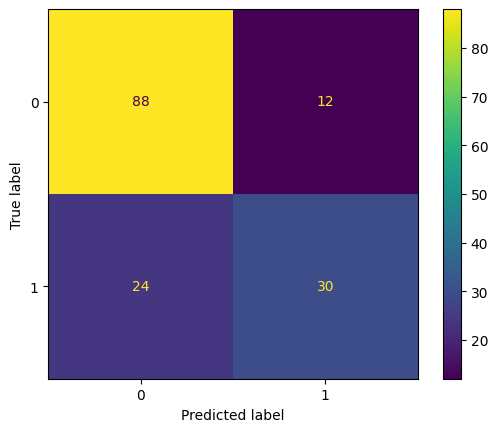

In [410]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, predicions)).plot()

دقة المودل ليست أفضل ما يكون، وهذا اما بسبب ان المودل لا يتناسب مع توزيع البيانات ولذا يجب اختيار مودل اخر

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

[[88 12]
 [22 32]]


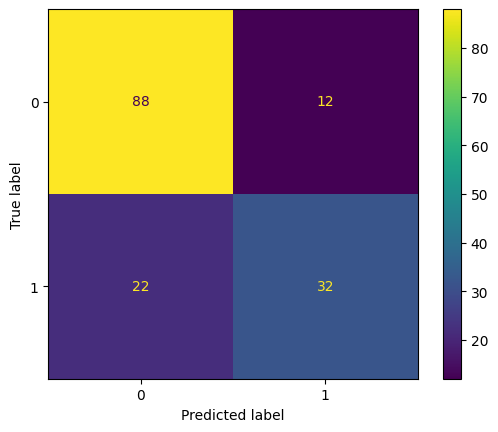

In [411]:
from sklearn.svm import SVC
svc=SVC(kernel='linear') #linear #rbf #poly #sigmoid

svc.fit(x_train,y_train)

## Prediction
y_pred=svc.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       100
           1       0.70      0.48      0.57        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154

[[89 11]
 [28 26]]


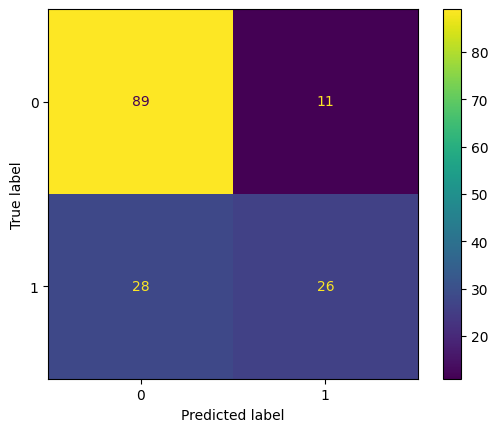

In [412]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred1=rbf.predict(x_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1)).plot()

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.72      0.48      0.58        54

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154

[[90 10]
 [28 26]]


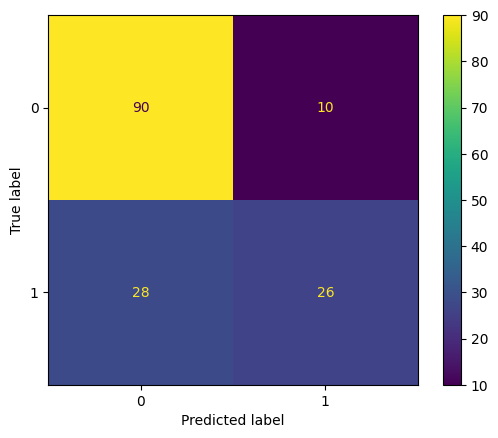

In [413]:
polynomial=SVC(kernel='poly')
polynomial.fit(x_train,y_train)
y_pred2=polynomial.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2)).plot()

              precision    recall  f1-score   support

           0       0.58      0.68      0.62       100
           1       0.11      0.07      0.09        54

    accuracy                           0.47       154
   macro avg       0.34      0.38      0.36       154
weighted avg       0.41      0.47      0.44       154

[[68 32]
 [50  4]]


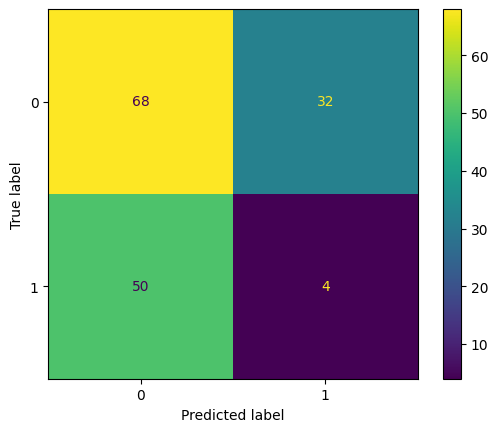

In [414]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)
## Prediction
y_pred3=sigmoid.predict(x_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred3)).plot()

In [415]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=15)

classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.87      0.81       100
           1       0.66      0.46      0.54        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.72      0.73      0.71       154



Making a prediction system

In [416]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as NB


from sklearn.metrics import accuracy_score as acc


## Beginning Model Training
models = [LC(), KNC(n_neighbors=15) , DTC(),RFC() ,SVC(),NB()]


for model in models:
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    acc_train = acc(y_train, y_train_pred)
    acc_test = acc(y_test, y_test_pred)


    print(type(model).__name__)

    print('Model performance for Training set')
    print("- Accuracy Score:", acc_train)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy Score:", acc_test)

    print('='*35)
    print('\n')

LogisticRegression
Model performance for Training set
- Accuracy Score: 0.7850162866449512
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7597402597402597


KNeighborsClassifier
Model performance for Training set
- Accuracy Score: 0.7996742671009772
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7272727272727273


DecisionTreeClassifier
Model performance for Training set
- Accuracy Score: 1.0
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7142857142857143




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier
Model performance for Training set
- Accuracy Score: 1.0
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7337662337662337


SVC
Model performance for Training set
- Accuracy Score: 0.7719869706840391
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7467532467532467


GaussianNB
Model performance for Training set
- Accuracy Score: 0.7719869706840391
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7272727272727273




#Hyperparameter Tuning


In [417]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

model = RandomForestClassifier()

n_estimators = [50, 100, 200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


KeyboardInterrupt: 

In [418]:
rfc = RFC(n_estimators= 200, min_samples_split= 5, max_features= 'sqrt', max_depth = 30,min_samples_leaf= 4)
rfc.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

# Evaluate Train and Test dataset
acc_train = acc(y_train, y_train_pred)
acc_test = acc(y_test, y_test_pred)

print(type(model).__name__)
print('Model performance for Training set')
print("- Accuracy Score:", acc_train)
print('----------------------------------')
print('Model performance for Test set')
print("- Accuracy Score:", acc_test)
print('='*35)
print('\n')

RandomForestClassifier
Model performance for Training set
- Accuracy Score: 0.9267100977198697
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7727272727272727




## Save Model

In [419]:
import pickle
filename = 'trained_model.sav'
pickle.dump(rfc, open(filename, 'wb'))